In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('data/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.shape

(17898, 9)

In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
# Rename columns
df.columns=['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [6]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
# Class Imbalance
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [9]:

df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


<Axes: >

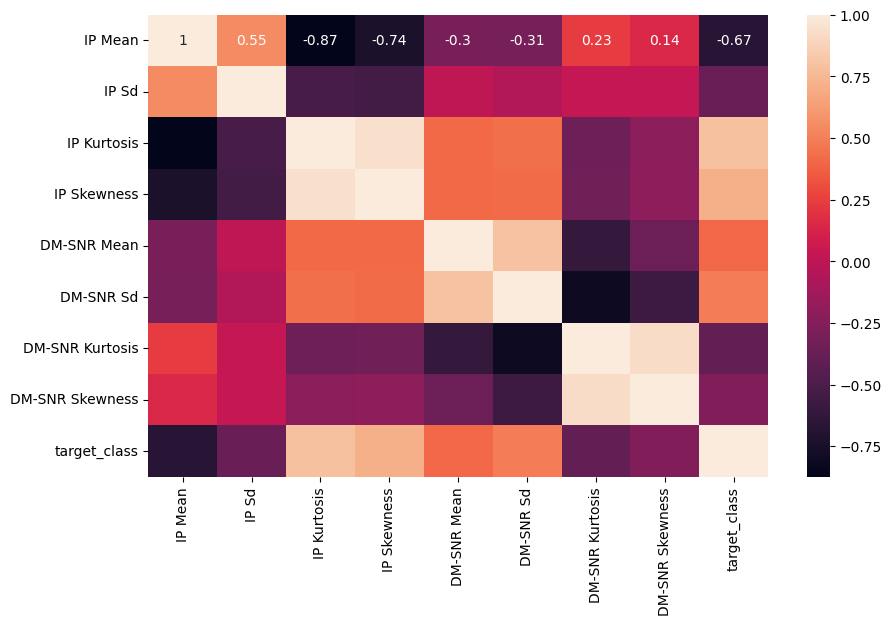

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
x = df.drop(columns='target_class')
x.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [16]:
y = df['target_class']
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [20]:
x_train.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
3055,120.640625,47.842962,0.257963,-0.090620,8.048495,35.198234,4.819784,23.528383
10138,116.554688,48.702992,0.197625,0.232600,3.041806,16.610678,8.166185,84.846709
3600,66.773438,58.206289,1.838734,2.414939,73.643813,80.673494,0.649639,-0.918078
16245,93.312500,34.314663,0.658339,2.928829,3.780936,22.213667,7.446869,61.135290
6079,99.343750,48.635513,0.470525,0.244099,1.701505,13.167891,11.177091,156.605608


In [21]:
x_test.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
5965,102.289062,45.759076,0.231698,0.227156,2.270067,14.343020,9.500368,117.057724
17707,120.093750,51.765311,0.152885,-0.395776,3.333612,19.674268,7.962004,73.625063
17795,108.820312,58.015951,0.396479,-0.473085,2.873746,19.469424,9.301734,94.655637
12444,137.085938,51.359491,0.004316,-0.139897,1.691472,11.533184,12.523379,219.538878
15566,93.140625,43.132017,0.543589,0.940103,0.820234,10.193051,17.569104,369.841602


In [22]:
y_train

3055     0
10138    0
3600     1
16245    0
6079     0
        ..
9225     1
13123    0
9845     0
10799    0
2732     0
Name: target_class, Length: 14318, dtype: int64

In [23]:
y_test

5965     0
17707    0
17795    0
12444    0
15566    0
        ..
4040     0
13626    0
6221     0
1391     0
15075    0
Name: target_class, Length: 3580, dtype: int64

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10)

In [25]:
model.fit(x_train, y_train)

SVC(C=10)

In [26]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
pd.DataFrame({'y_test':y_test, 'y_predict':y_pred})

,y_test,y_predict
5965,0,0
17707,0,0
17795,0,0
12444,0,0
15566,0,0
...,...,...
4040,0,0
13626,0,0
6221,0,0
1391,0,0


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))      
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification Report:\n ', classification_report(y_test, y_pred))

Accuracy Score:  0.9793296089385475
Precision Score:  0.9310344827586207
Recall Score:  0.7883211678832117
F1 Score:  0.8537549407114624
Confusion Matrix:
  [[3290   16]
 [  58  216]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       0.93      0.79      0.85       274

    accuracy                           0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580

